    Ignorant  Spreader  Stifler
0        297         3        0
1        296         4        0
2        296         4        0
3        291         9        0
4        290        10        0
5        289        11        0
6        289        11        0
7        287        13        0
8        287        13        0
9        284        16        0
10       282        18        0
11       282        18        0
12       282        18        0
13       282        18        0
14       281        19        0
15       281        19        0
16       278        22        0
17       277        23        0
18       276        24        0
19       275        25        0
20       274        26        0
21       272        28        0
22       272        28        0
23       269        31        0
24       265        35        0
25       264        36        0
26       262        38        0
27       256        44        0
28       253        47        0
29       250        50        0
30      

<Figure size 640x480 with 0 Axes>

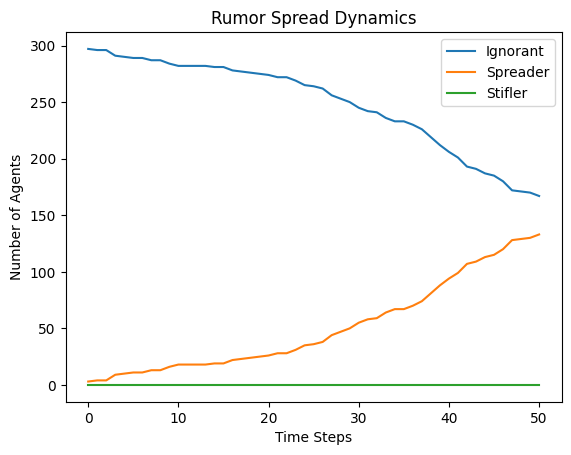

In [ ]:
from enum import Enum
import networkx as nx
from mesa import Agent, Model
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
import matplotlib.pyplot as plt

class Stat
class RumorAgent(Agent):
    def __init__(
        self,
        model
    ):
        super().__init__(model)
        self.state = "Ignorant"

    def step(self):
        if self.state == "Spreader":
            neighbors_nodes = self.model.grid.get_neighborhood(
            self.pos, include_center=False
        )
            susceptible_neighbors = [
                agent
                for agent in self.model.grid.get_cell_list_contents(neighbors_nodes)
                if agent.state == "Ignorant"
            ]
            for a in susceptible_neighbors:
                if self.random.random() < self.model.spread_probability:
                    a.state = "Spreader"
        if self.random.random() < self.model.stop_propability:
                self.state = "Stifler"

class RumorModel(Model):
    def __init__(
        self,
        graph_path,
        spread_probability,
        stop_propability,
        number_of_first_spreaders,
        seed=None
    ):
        super().__init__(seed=seed)
        self.spread_probability = spread_probability
        self.stop_propability = stop_propability
        self.number_of_first_spreaders = number_of_first_spreaders
        
        self.G = nx.read_gexf(graph_path)
        self.grid = NetworkGrid(self.G)
        
        self.datacollector = DataCollector(
            {"Ignorant": lambda model: self.number_state(model, "Ignorant"),
                "Spreader": lambda model: self.number_state(model, "Spreader"),
                "Stifler": lambda model: self.number_state(model, "Stifler")}
        )

        for node in self.G.nodes:
            a = RumorAgent(self)
            self.grid.place_agent(a, node)
        
        spreader_nodes = self.random.sample(list(self.G), self.number_of_first_spreaders)
        for a in self.grid.get_cell_list_contents(spreader_nodes):
            a.state = "Spreader"
        
        self.RUNNING = True
        self.datacollector.collect(self)
    def step(self):
        self.agents.shuffle_do("step")
        # collect data
        self.datacollector.collect(self)
    
    @staticmethod
    def number_state(model, state):
        return sum(1 for a in model.grid.get_all_cell_contents() if a.state == state)

    
model = RumorModel(graph_path="Graph.gexf", spread_probability=0.1, stop_propability=0, number_of_first_spreaders=3)

# اجرای 50 گام زمانی
for i in range(50):
    model.step()
fig = plt.figure()
data = model.datacollector.get_model_vars_dataframe()
print(data)
data.plot()
plt.xlabel("Time Steps")
plt.ylabel("Number of Agents")
plt.title("Rumor Spread Dynamics")
plt.show()